# FF Convergence

In [5]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from utils import saver, loader
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum, coat_spectrum, spectrum_to_angular, spectrum_to_radial
from analysis import spectrum_to_angular, spectrum_to_radial, hist_ensamble, scatterplot_stats

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [6]:
plt.rcParams.update({'font.size': 14})

In [7]:
def scatterplot_stats(radial_list, angular_list):
    # stack list
    N = len(radial_list)
    radial_mean_list = []
    angular_mean_list = []
    for radial, angular in zip(radial_list, angular_list):
        radial_mean = np.mean(radial)
        radial_mean_list.append(radial_mean)

        angular_mean = np.mean(-np.mean(np.cos(angular)))
        angular_mean_list.append(angular_mean)


    
    r_mean = np.mean(radial_mean_list)
    a_mean = np.mean(angular_mean_list)

    r_std = np.std(radial_mean_list)/np.sqrt(N)
    a_std = np.std(angular_mean_list)/np.sqrt(N)

    return r_mean, r_std, a_mean, a_std

## Noisy More Samples

### FF

In [8]:
model_list = loader("models/model_list_FF_noisy_CM.model")

[channel_numeric_list, spectrum_numeric_list, csr_numeric_list] = loader("data/FF_synthetic_benchmark.pkl")

print(len(model_list))
spectrum_exp_list = [channel_spectrum(model.channel) for model in model_list]
csr_exp_list = [complex_spacing_ratio(spectrum) for spectrum in spectrum_exp_list]


10


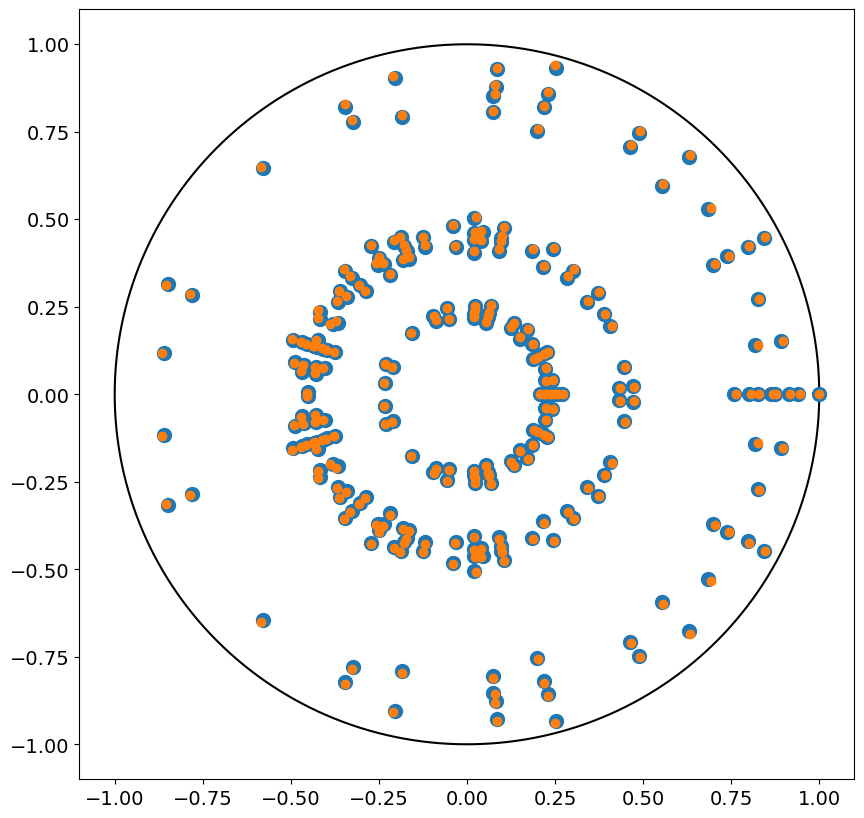

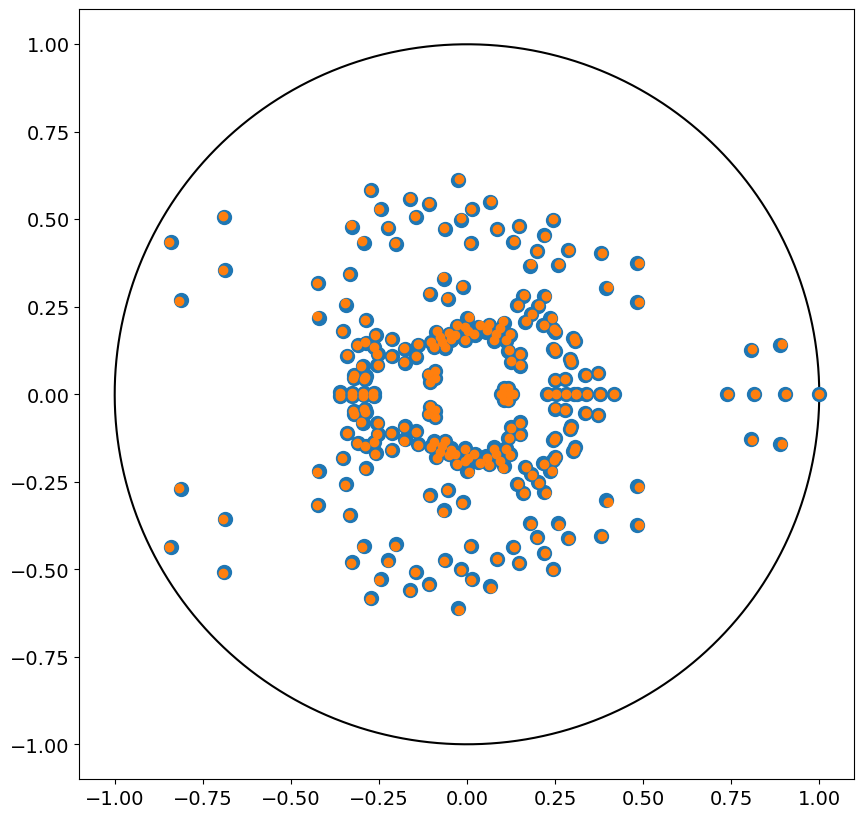

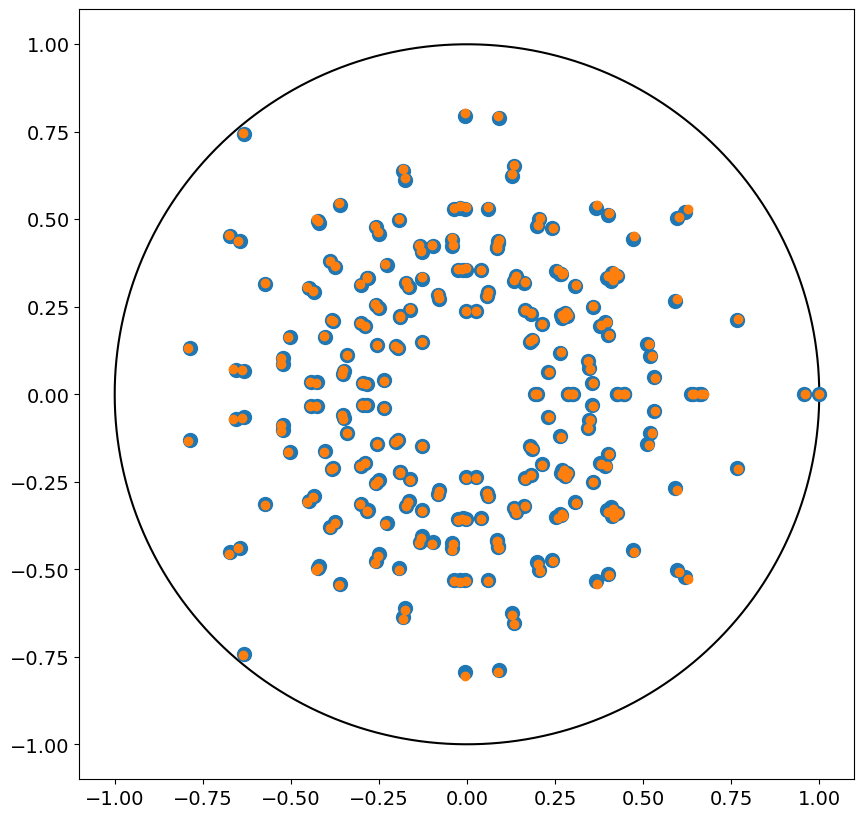

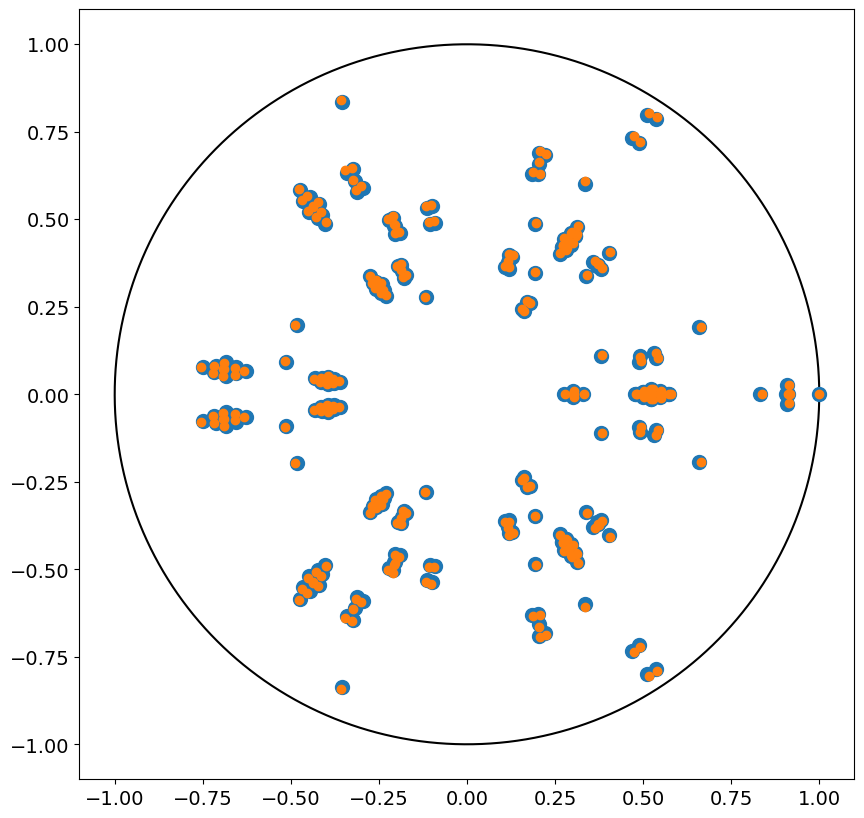

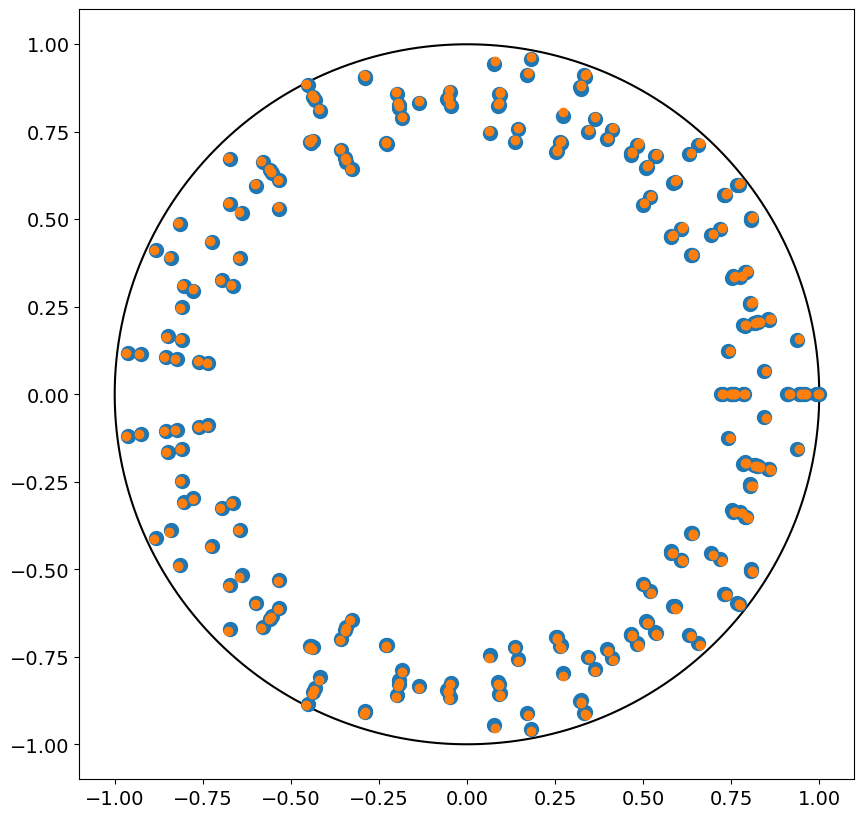

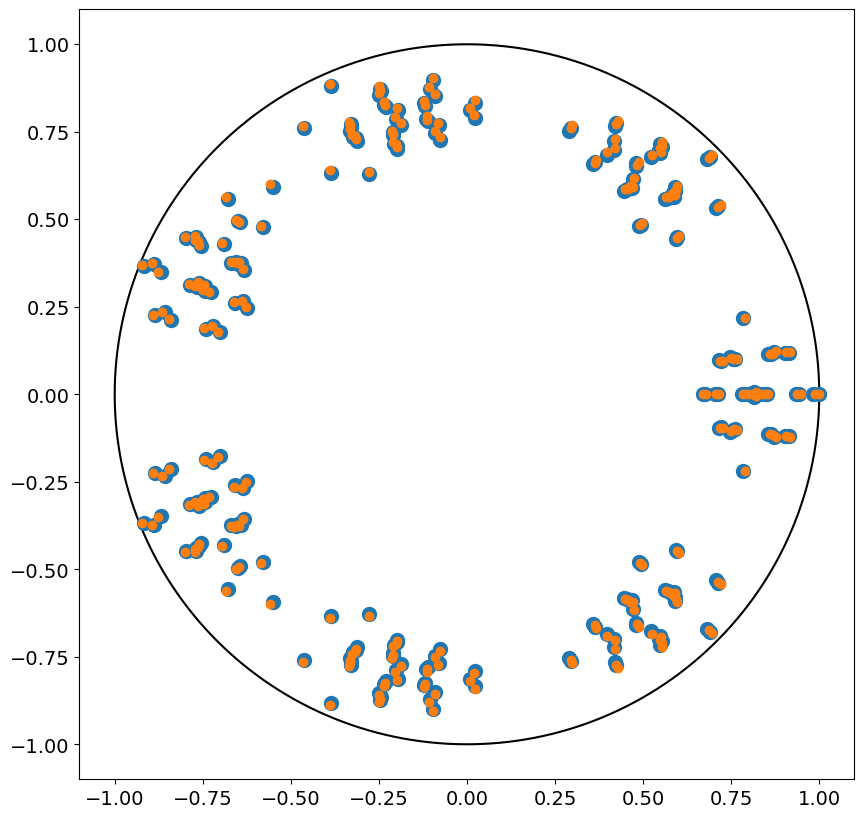

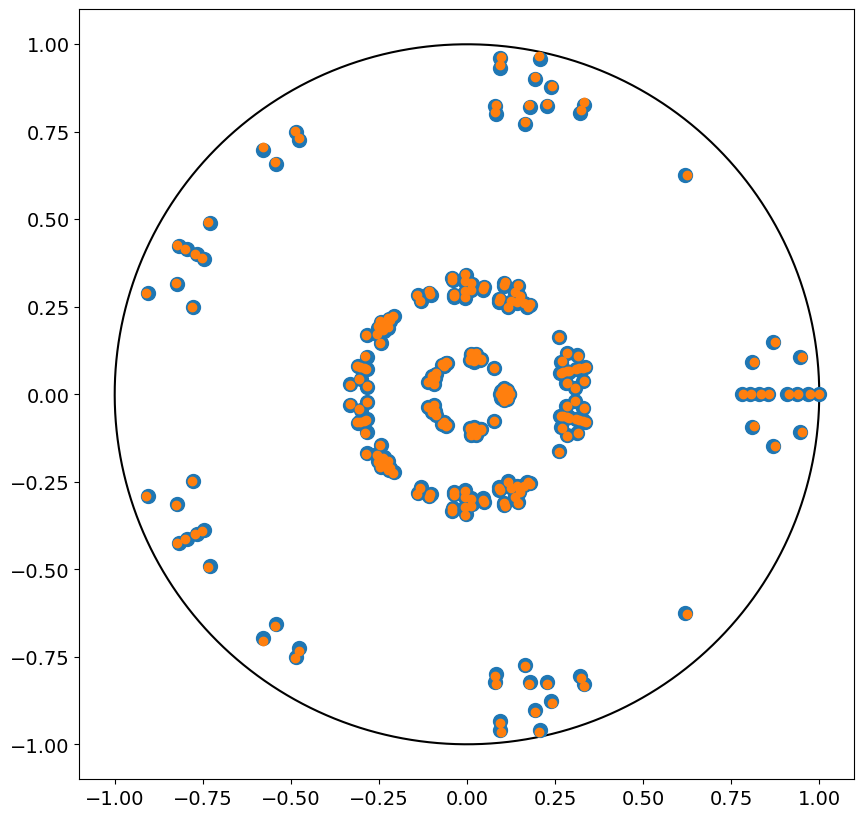

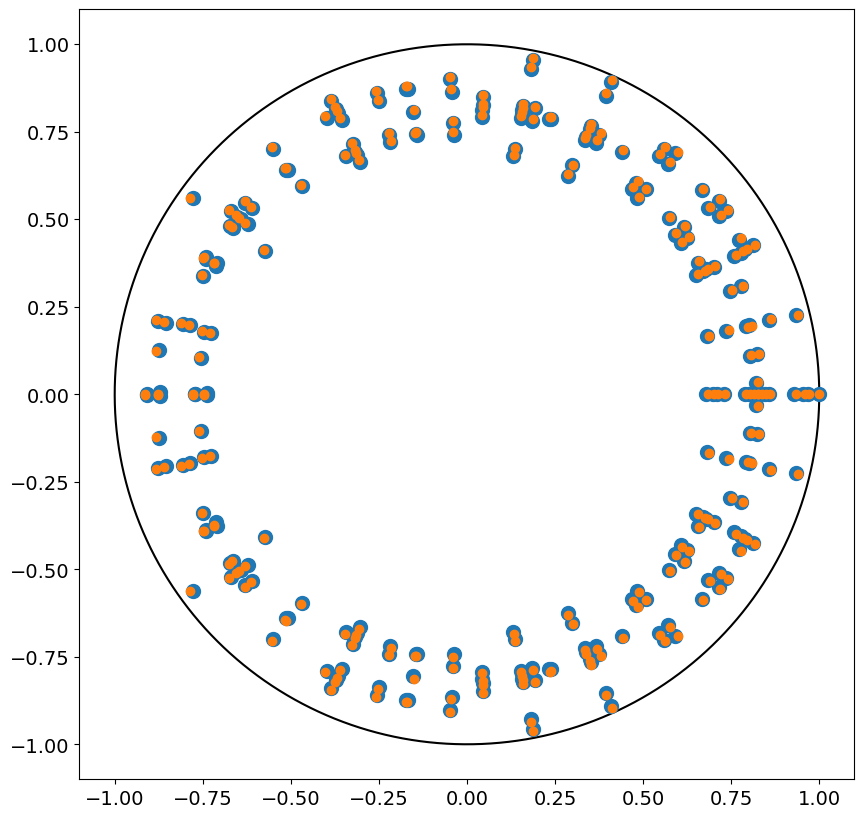

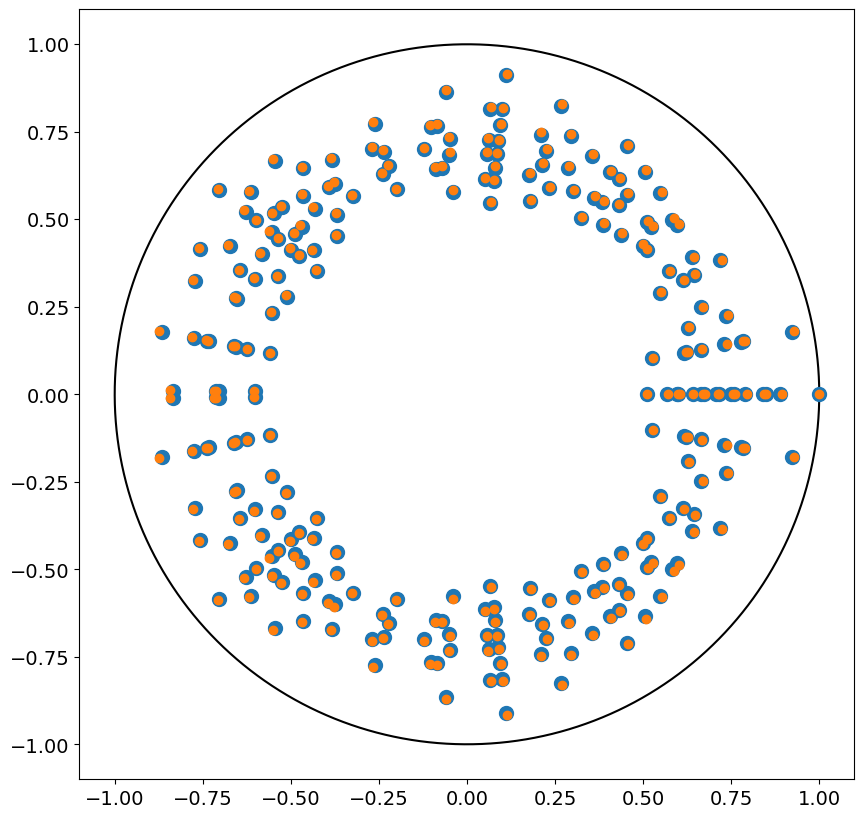

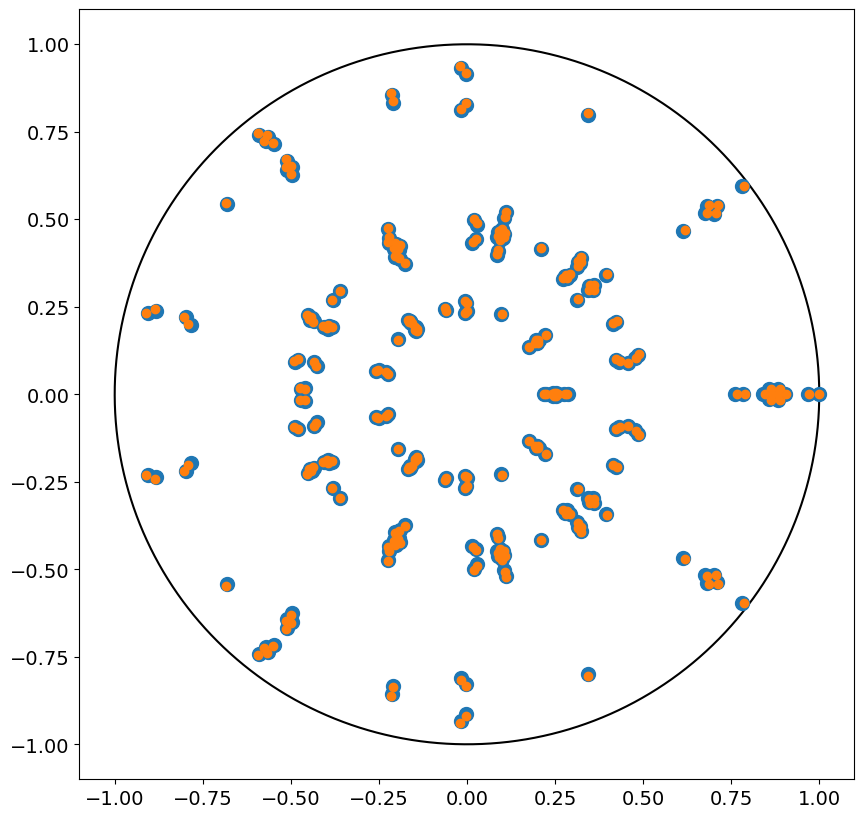

In [9]:
for spectrum_exp, spectrum_num in zip(spectrum_exp_list, spectrum_numeric_list):
    spectrum_exp.plot_circle()
    spectrum_exp.plot(markersize=10)
    spectrum_num.plot(markersize=6)
    plt.show()

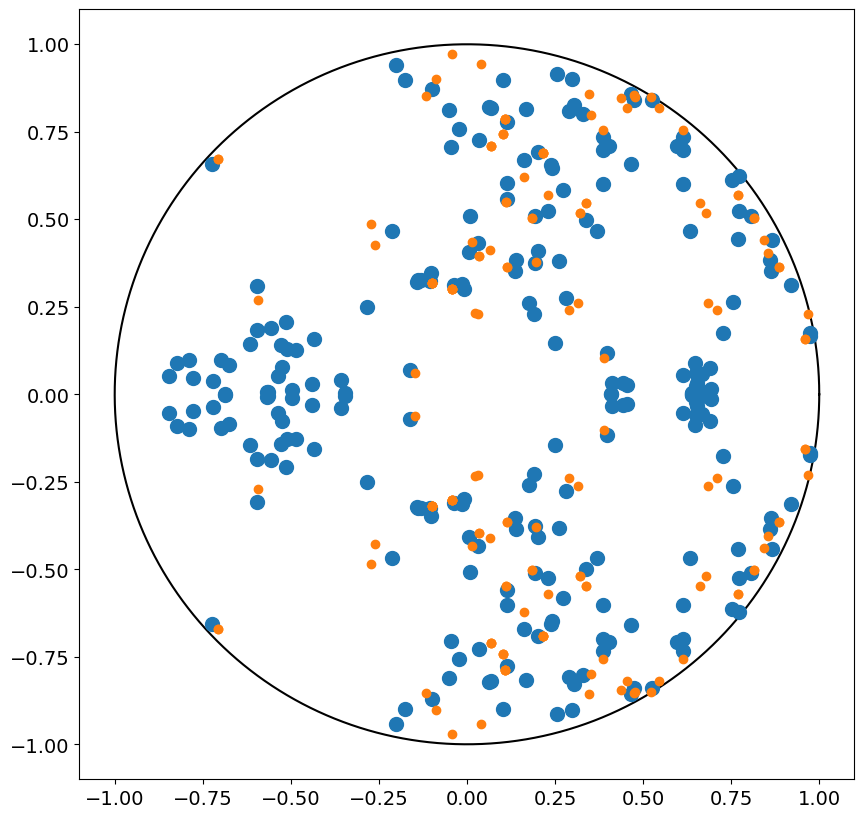

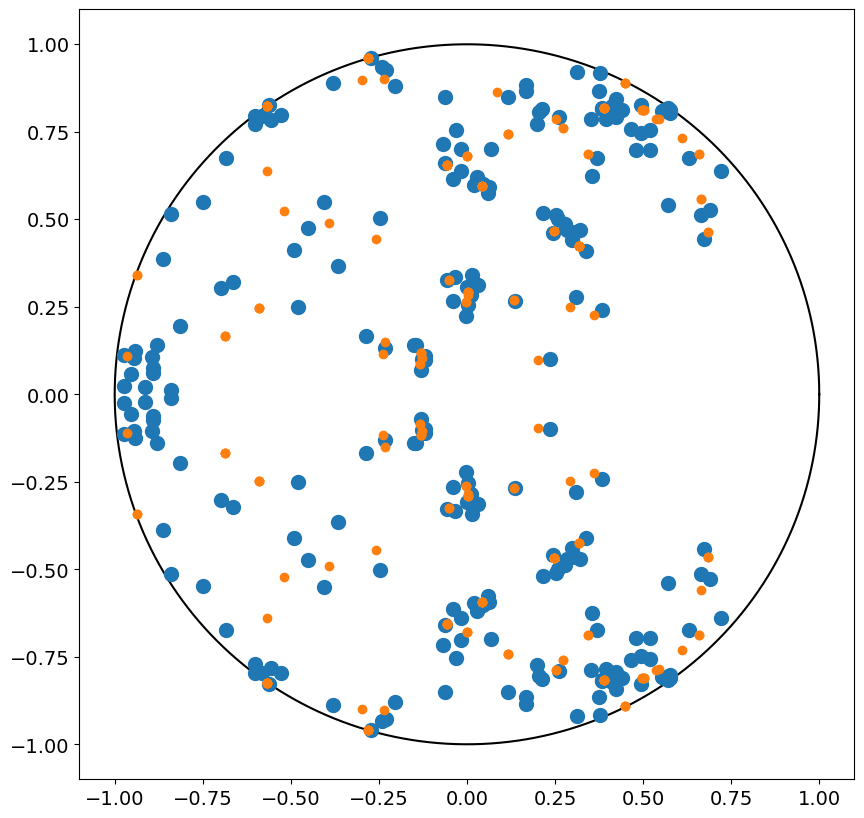

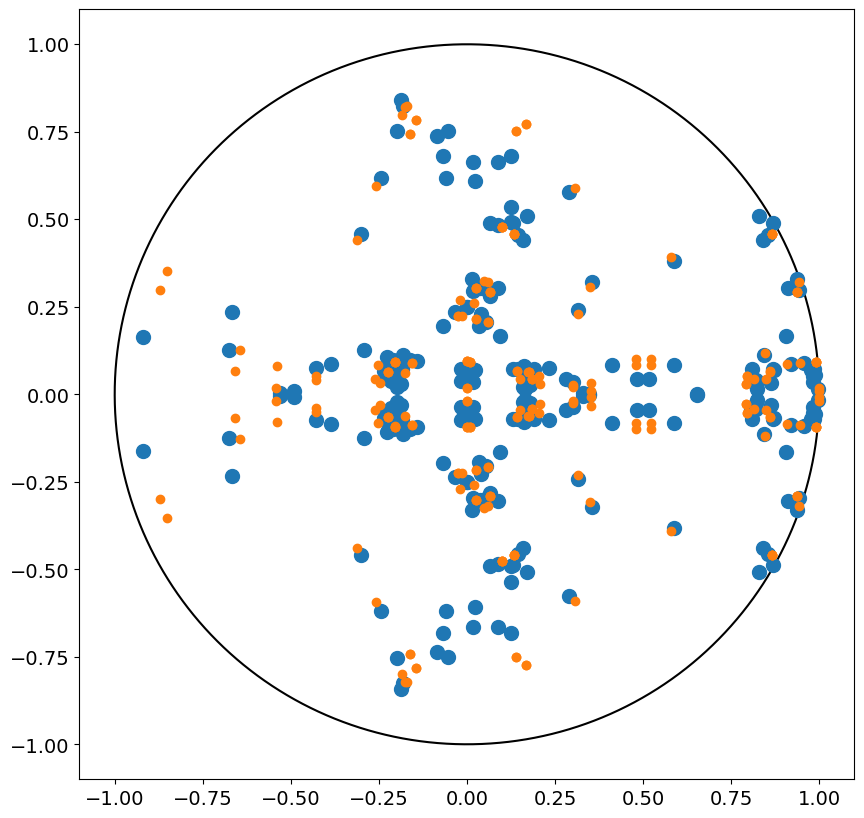

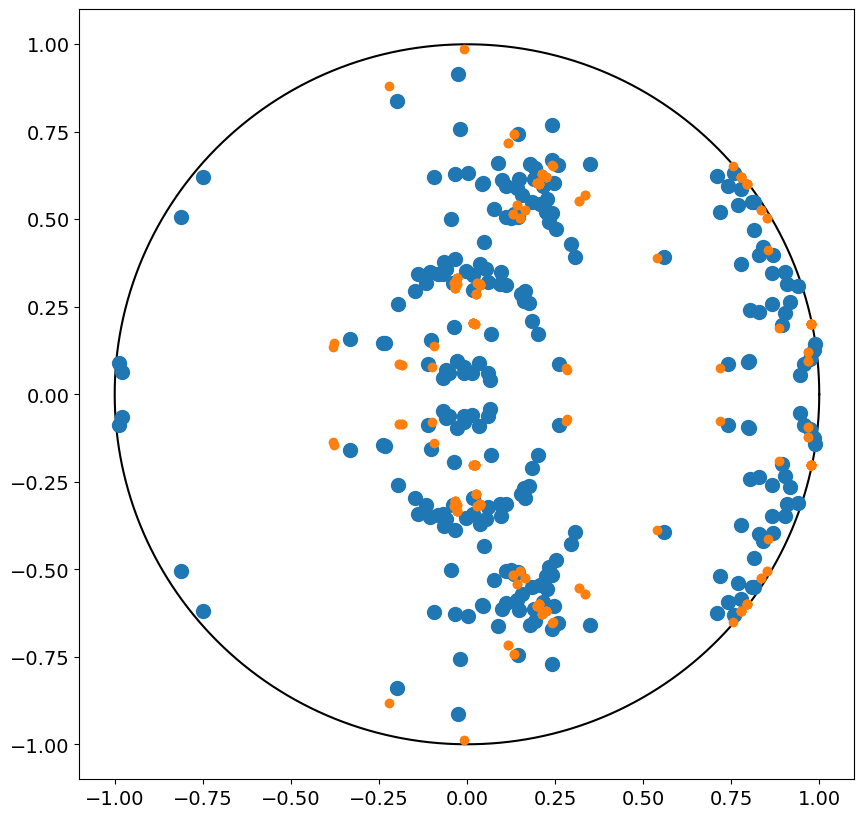

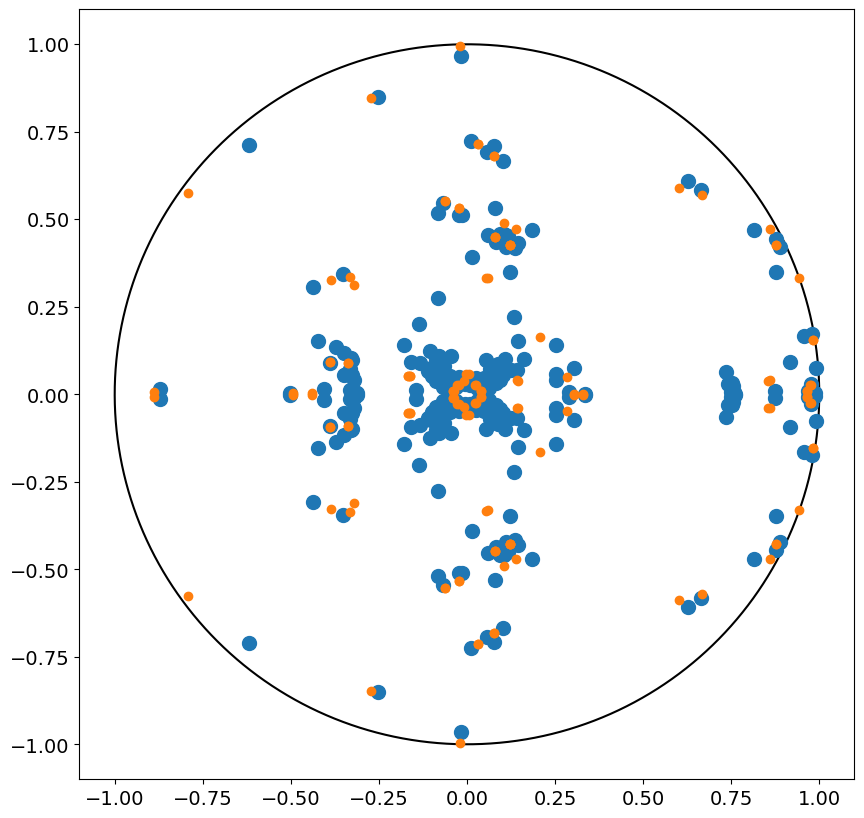

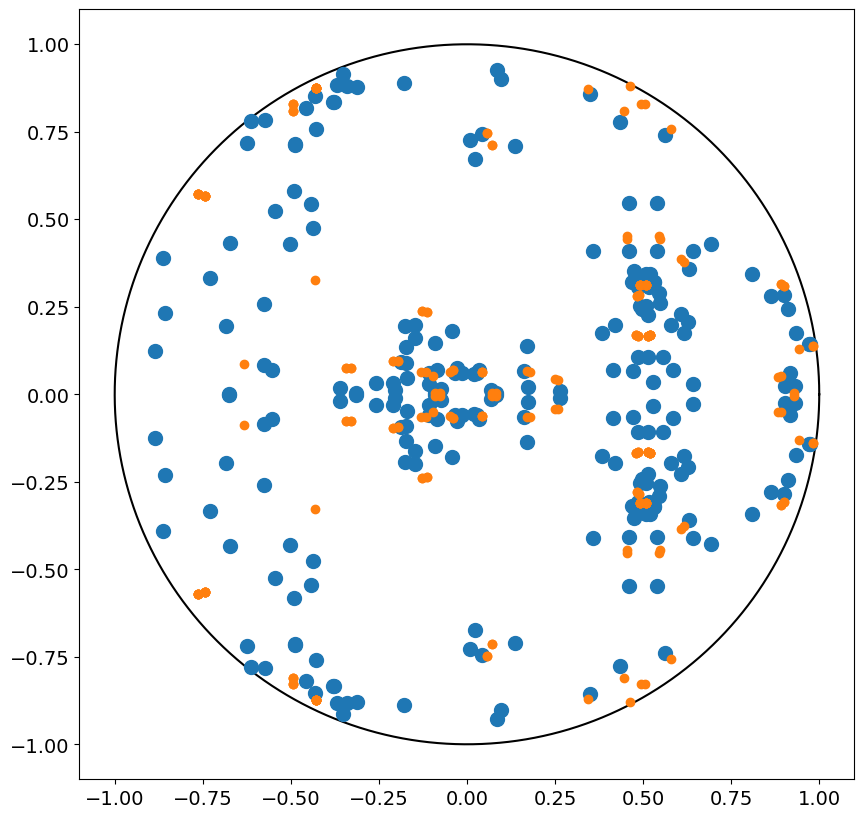

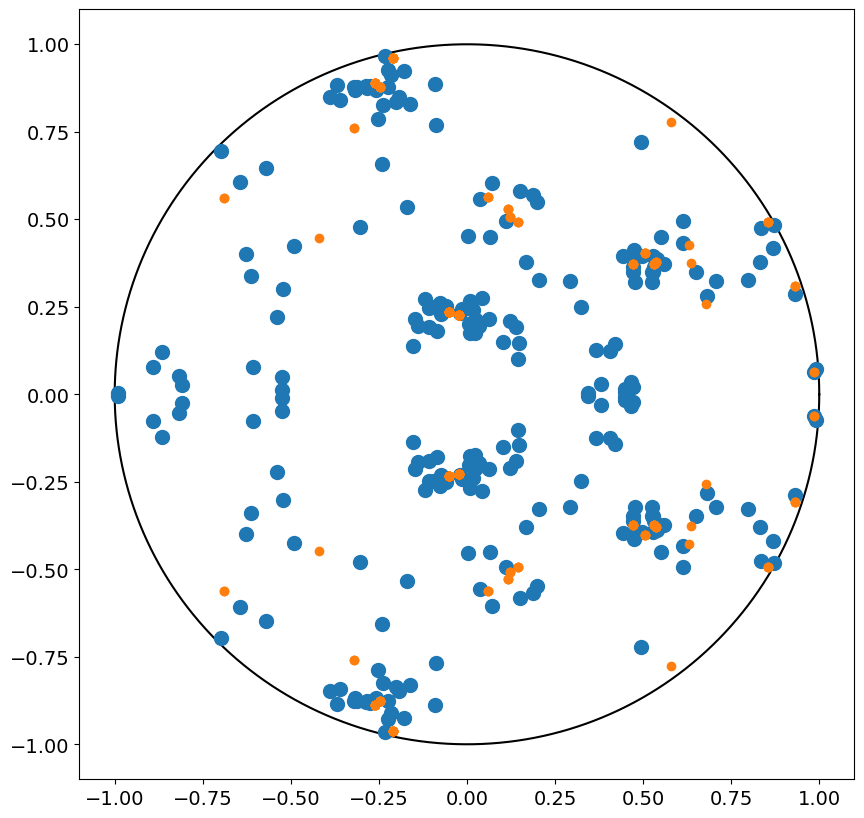

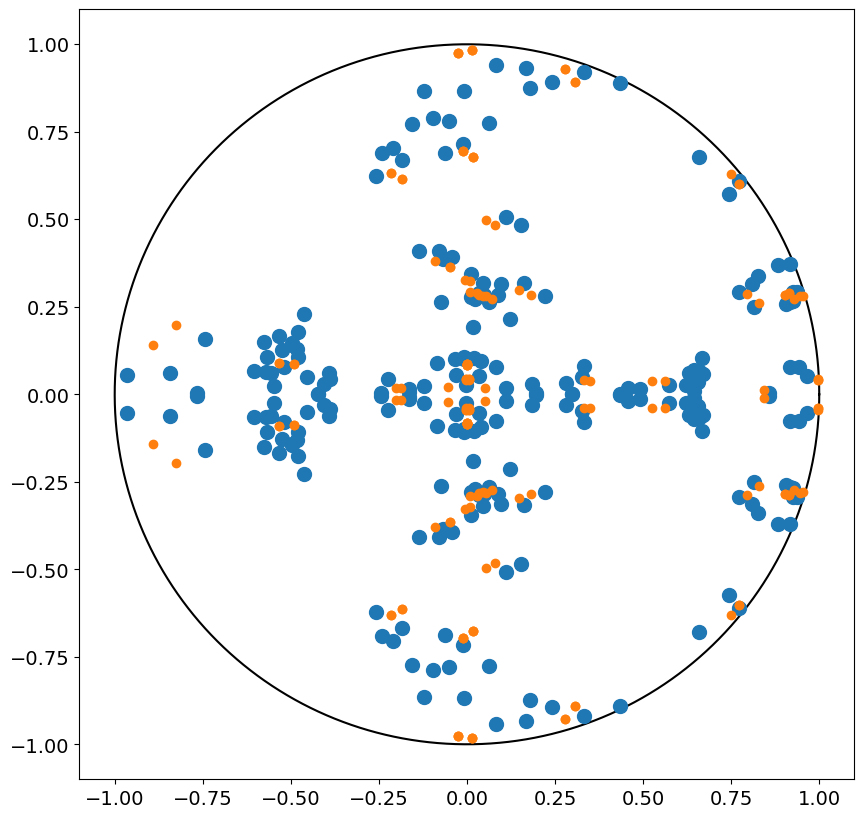

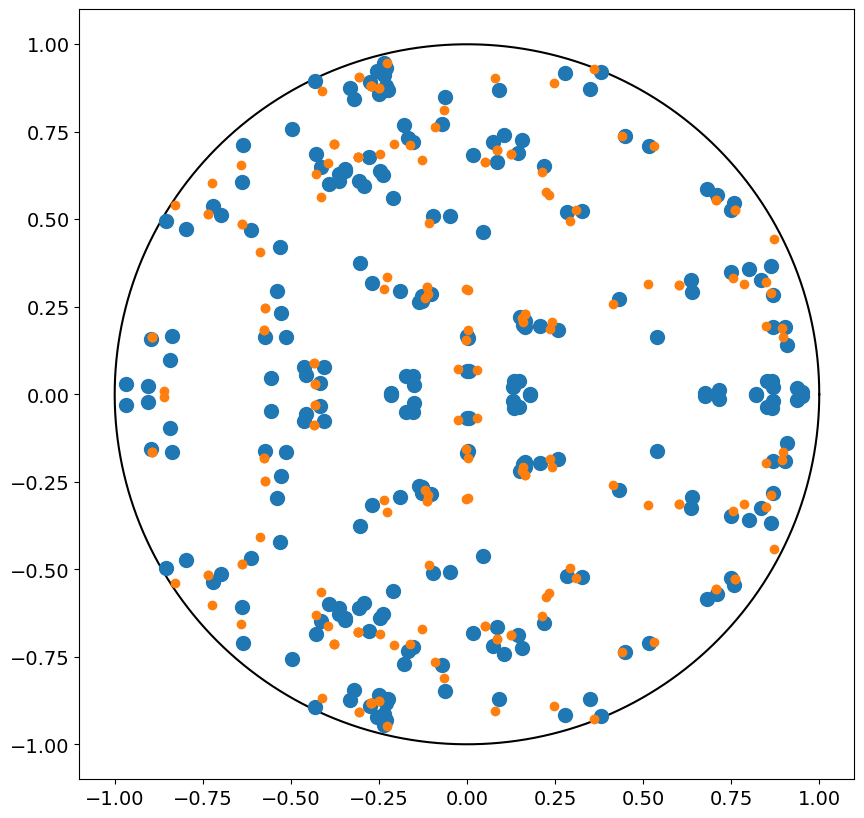

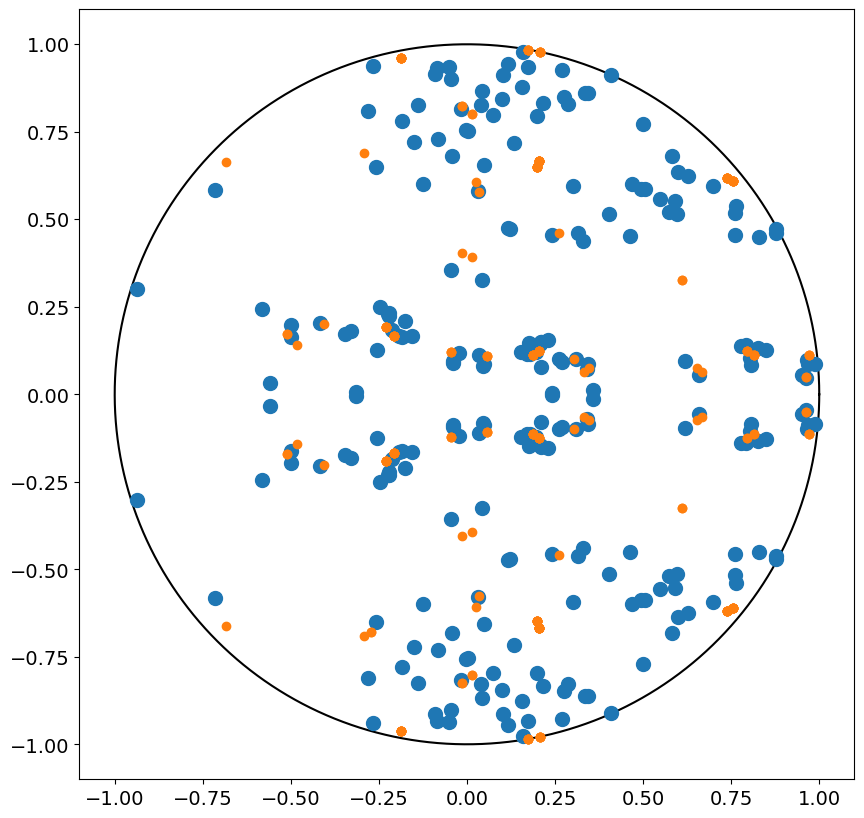

In [10]:
for csr_exp, csr in zip(csr_exp_list, csr_numeric_list):
    csr_exp.plot_circle()
    csr_exp.plot(markersize=10)
    csr.plot(markersize=6)
    plt.show()

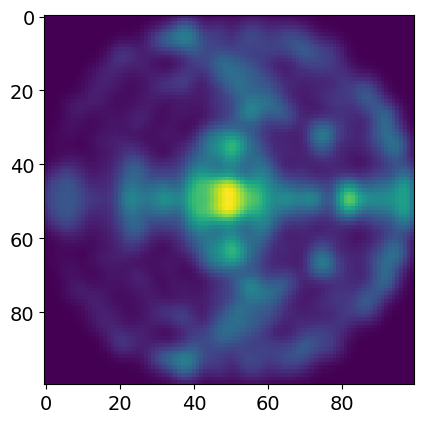

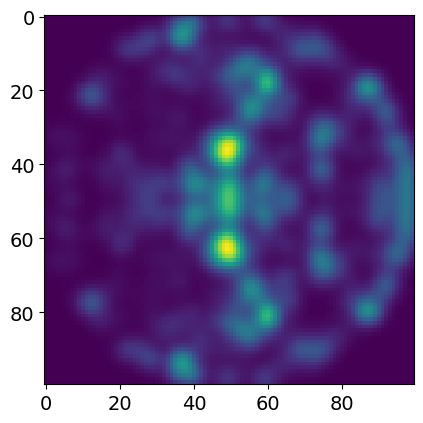

In [11]:
csr_exp_coat = coat_spectrum(Spectrum(csr_exp_list), sigma=0.05)
csr_coat = coat_spectrum(Spectrum(csr_numeric_list), sigma=0.05)

plt.imshow(csr_exp_coat)
plt.show()

plt.imshow(csr_coat)
plt.show()

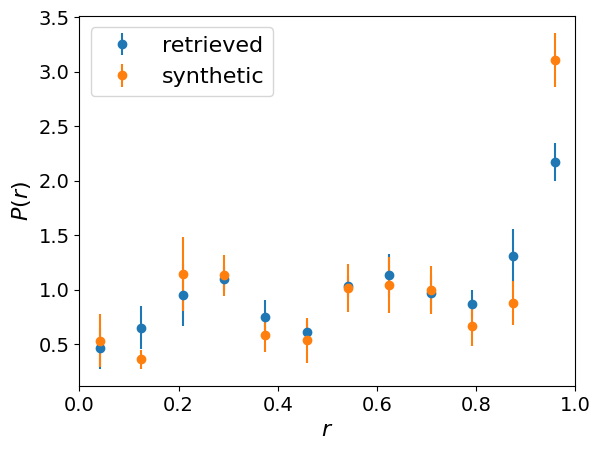

In [12]:
bins, radial_exp_mean, radial_ext_err, radial_ext_serr = hist_ensamble(spectrum_to_radial(csr_exp_list), bins=np.linspace(0, 1, 13), density=True)
bins, radial_num_mean, radial_num_err, radial_num_serr = hist_ensamble(spectrum_to_radial(csr_numeric_list), bins=np.linspace(0, 1, 13), density=True)

plt.errorbar(bins, radial_exp_mean, radial_ext_err, fmt='o', label='retrieved')
plt.errorbar(bins, radial_num_mean, radial_num_err, fmt='o', label='synthetic')
plt.legend(fontsize=16)
plt.xlim(0, 1)
plt.xlabel(r"$r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)
plt.savefig("figures/radial_csr_integrable.svg", bbox_inches='tight')
plt.show()

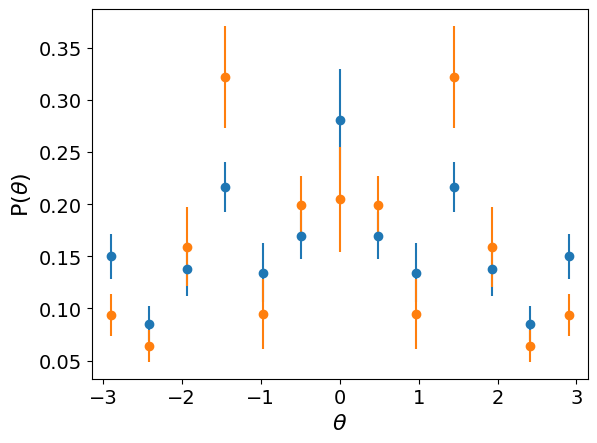

In [13]:
bins, angular_exp_mean, angular_ext_err, angular_ext_serr = hist_ensamble(spectrum_to_angular(csr_exp_list), bins=np.linspace(-np.pi, np.pi, 14), density=True)
bins, angular_num_mean, angular_num_err, angular_num_serr = hist_ensamble(spectrum_to_angular(csr_numeric_list), bins=np.linspace(-np.pi, np.pi, 14), density=True)

plt.errorbar(bins, angular_exp_mean, angular_ext_err , fmt='o', label='experiment')
plt.errorbar(bins, angular_num_mean, angular_num_err, fmt='o', label='synthetic')
plt.xlim(-np.pi, np.pi)
plt.xlabel(r"$\theta$", fontsize=16)
plt.ylabel(r"P($\theta$)", fontsize=16)
plt.savefig("figures/angular_csr_integrable.svg", bbox_inches='tight')
plt.show()

### Scatter plots

In [14]:
radial_exp = spectrum_to_radial(csr_exp_list)
radial_numeric = spectrum_to_radial(csr_numeric_list)

angular_exp = spectrum_to_angular(csr_exp_list)
angular_numeric = spectrum_to_angular(csr_numeric_list)

In [15]:
scatter_integ_retrieved = scatterplot_stats(radial_exp, angular_exp)
scatter_integ_exact = scatterplot_stats(radial_numeric, angular_numeric)

## Chaotic Maps

In [16]:
model_list = loader("models/model_list_chaotic_noisy.model")

[channel_numeric_list, spectrum_numeric_list, csr_numeric_list] = loader("data/chaotic_synthetic_benchmark.pkl")

print(len(model_list))
spectrum_exp_list = [channel_spectrum(model.channel) for model in model_list]
csr_exp_list = [complex_spacing_ratio(spectrum) for spectrum in spectrum_exp_list]

10


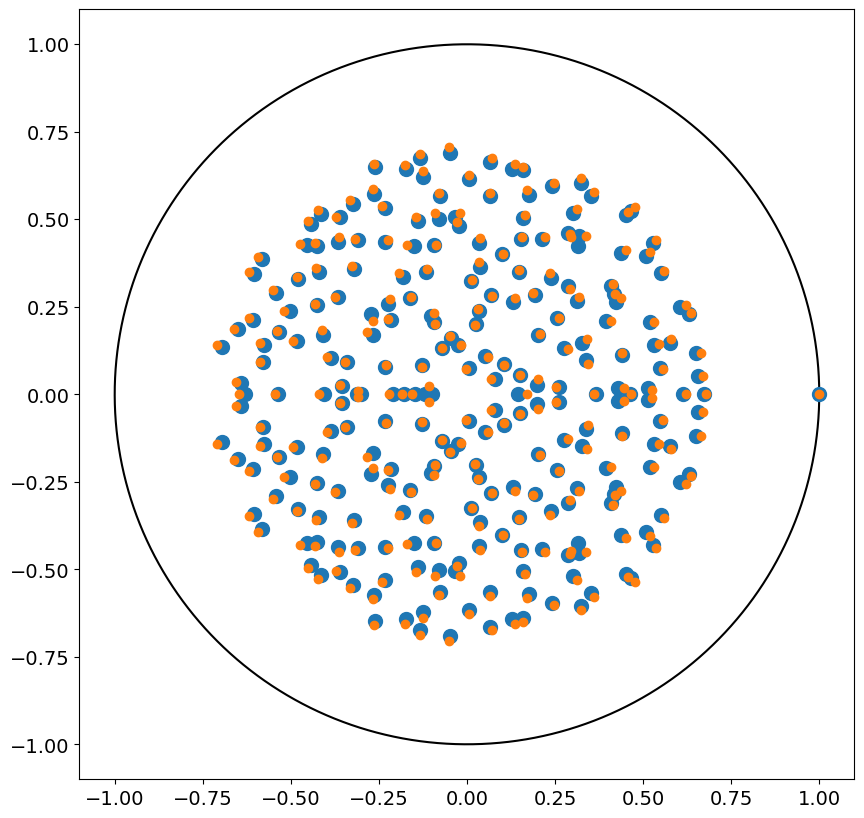

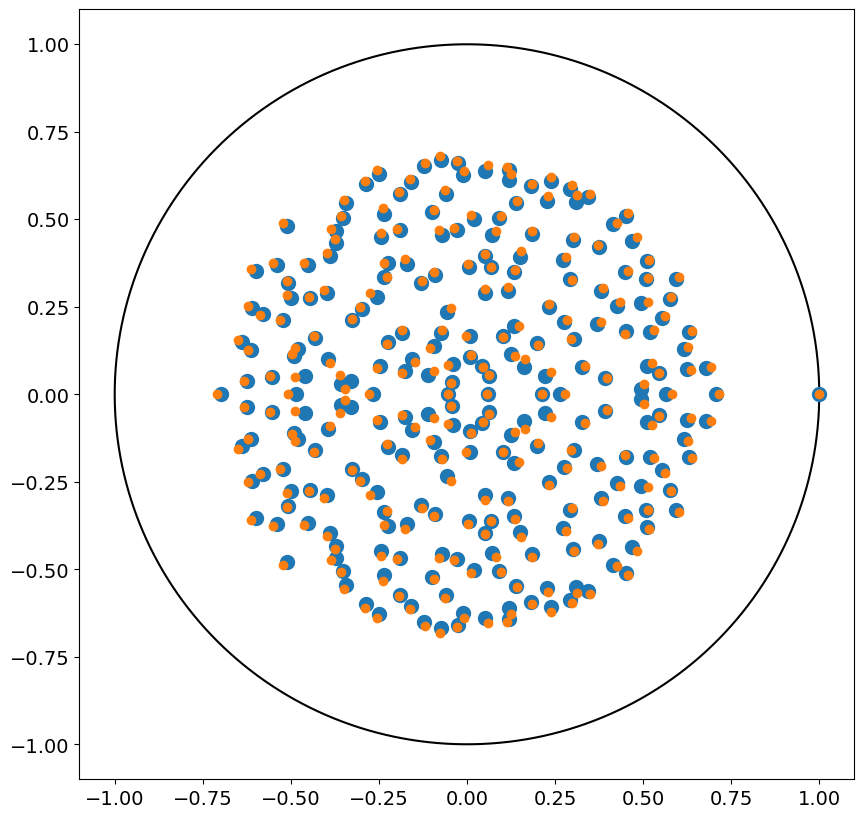

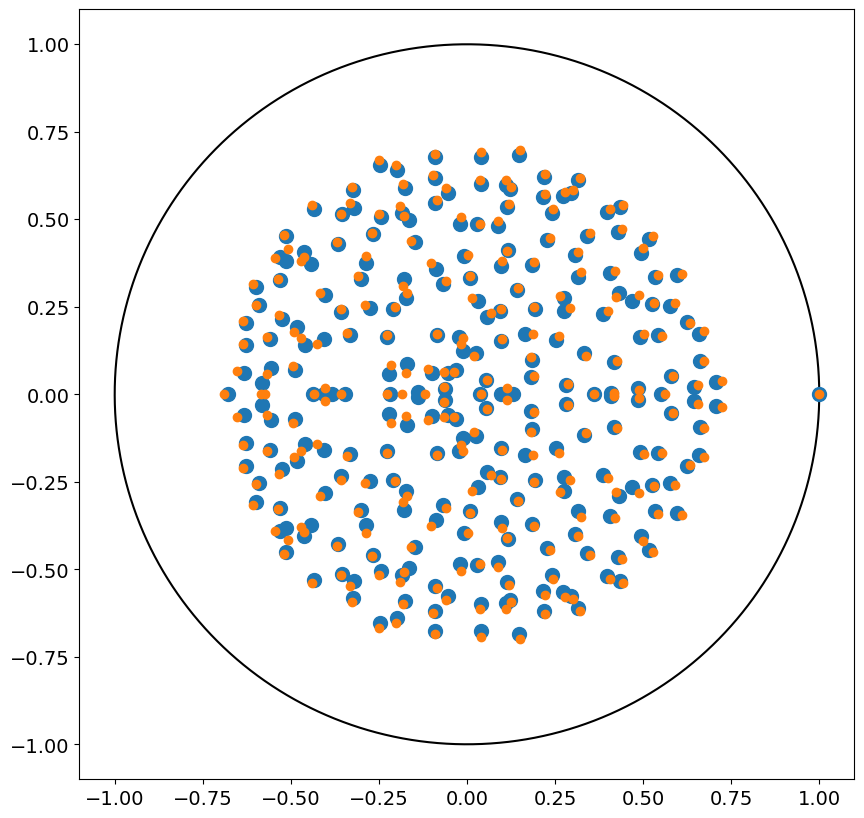

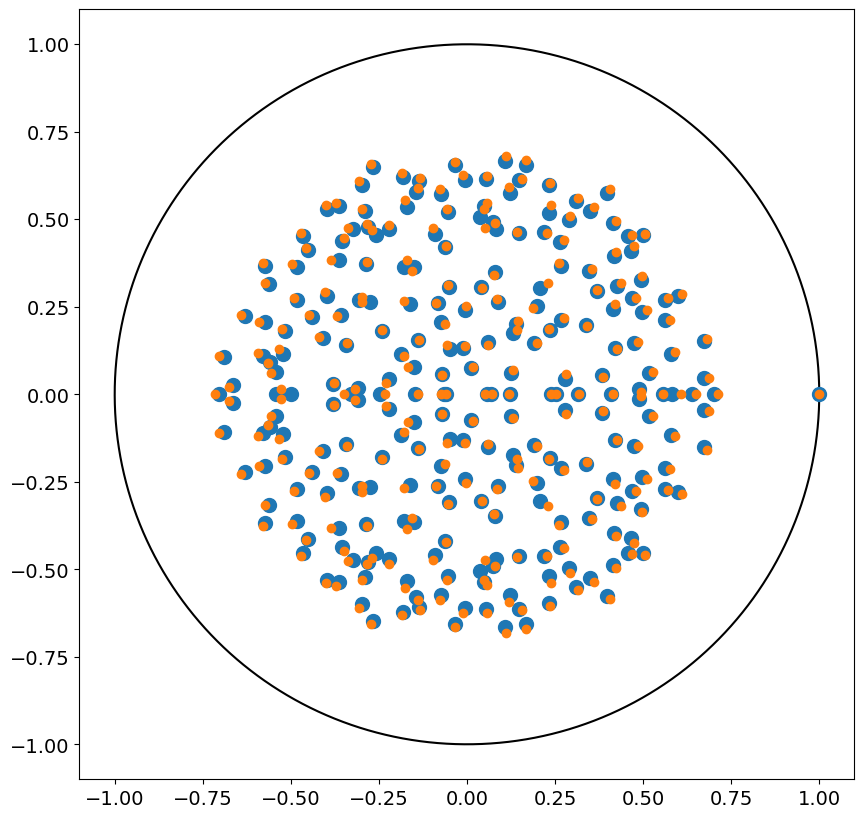

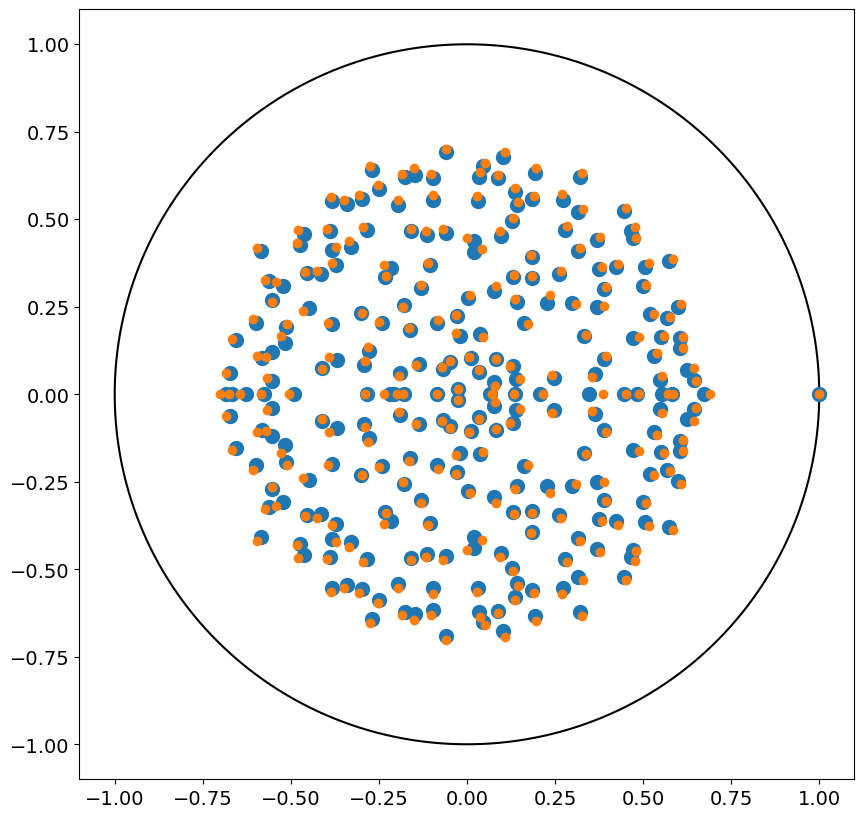

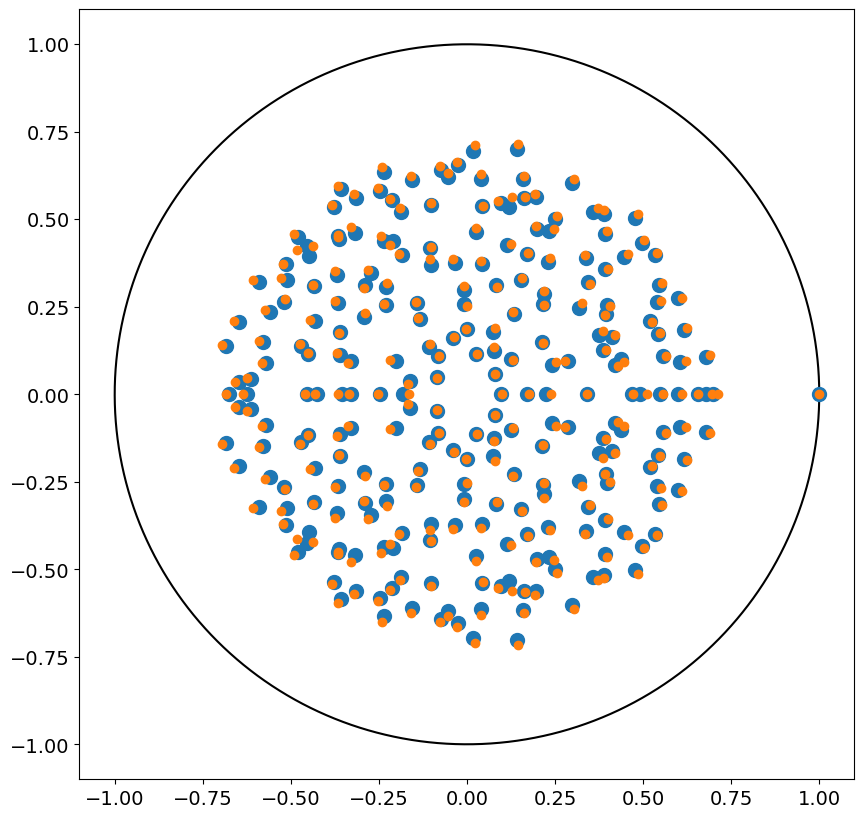

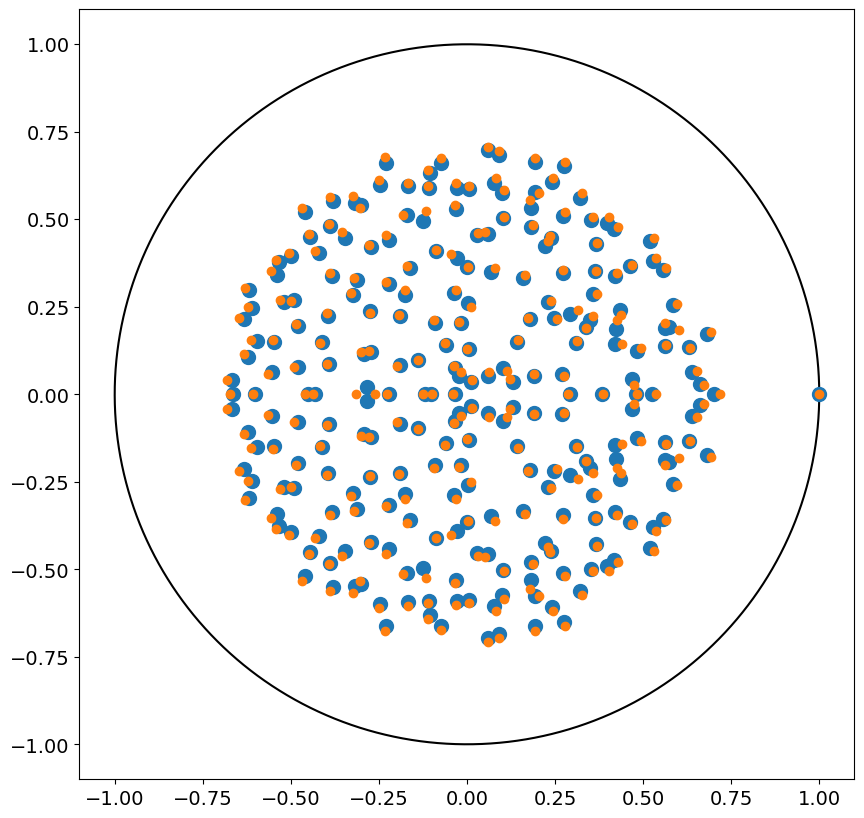

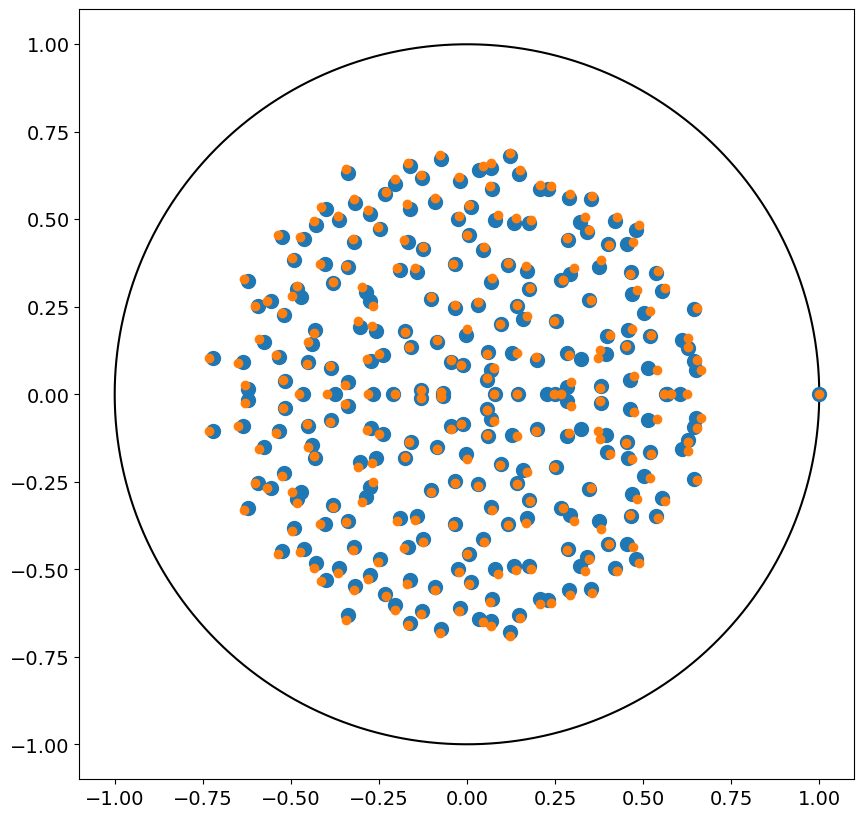

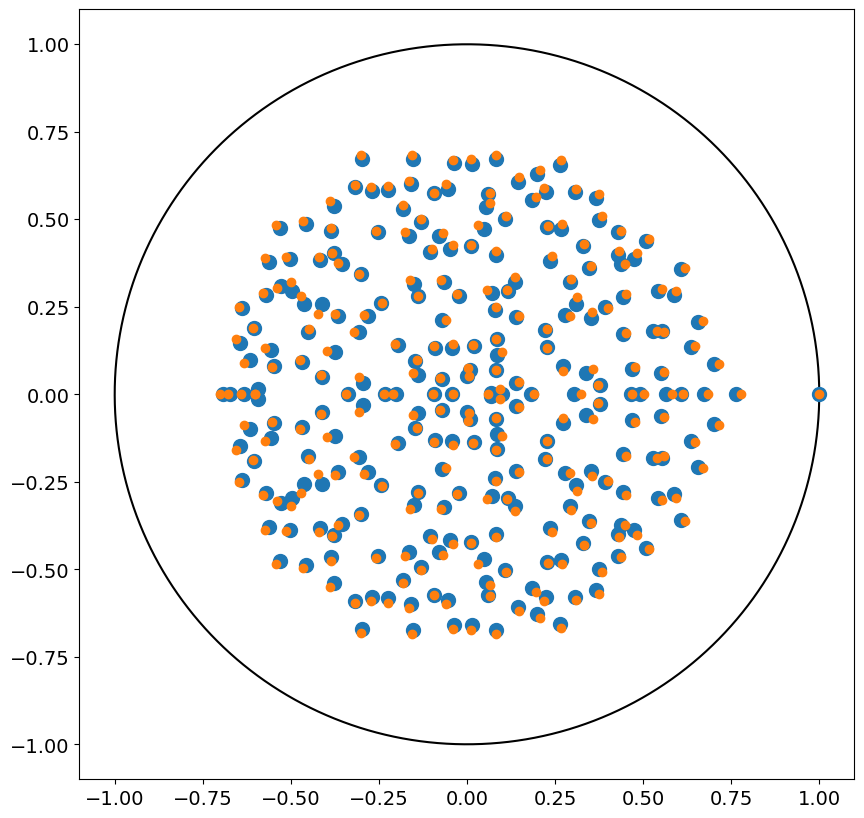

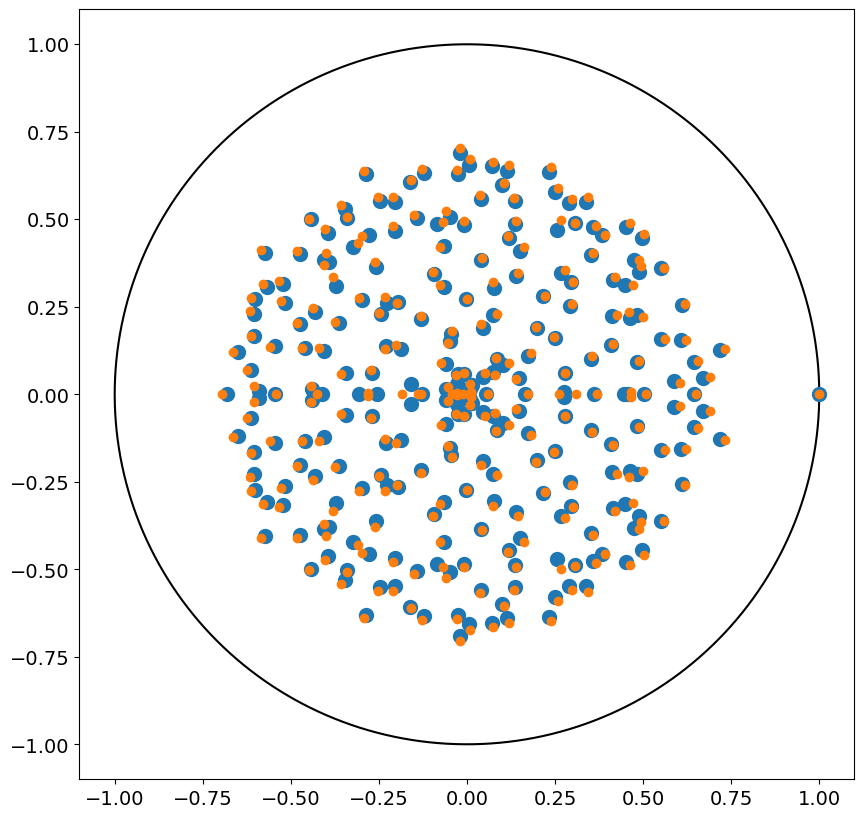

In [17]:
for spectrum_exp, spectrum in zip(spectrum_exp_list, spectrum_numeric_list):
    spectrum_exp.plot_circle()
    spectrum_exp.plot(markersize=10)
    spectrum.plot(markersize=6)
    plt.show()

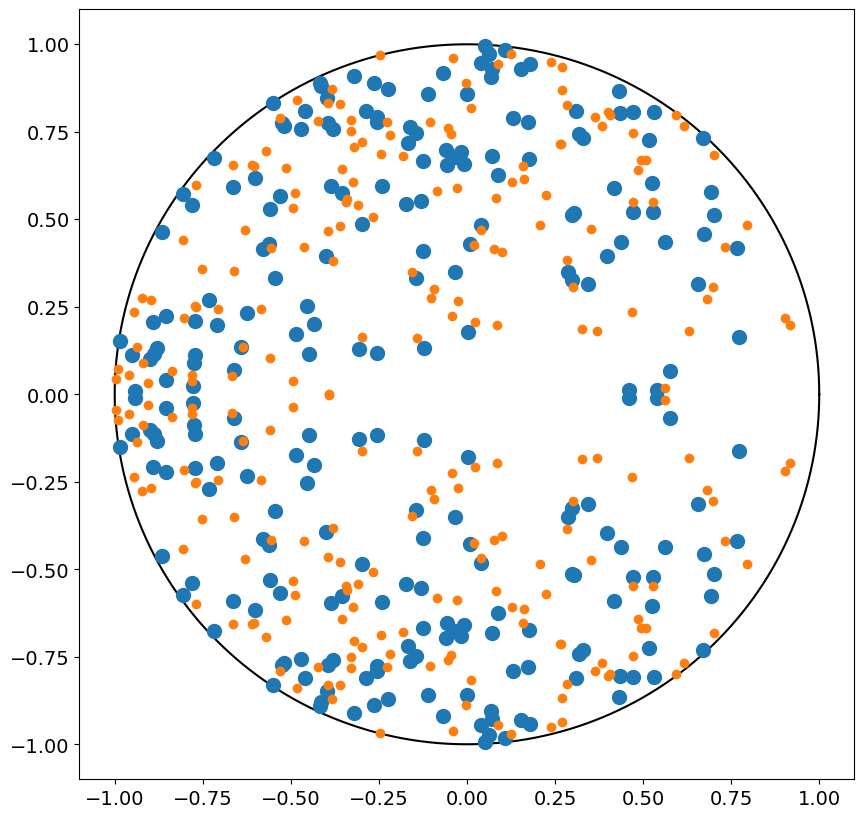

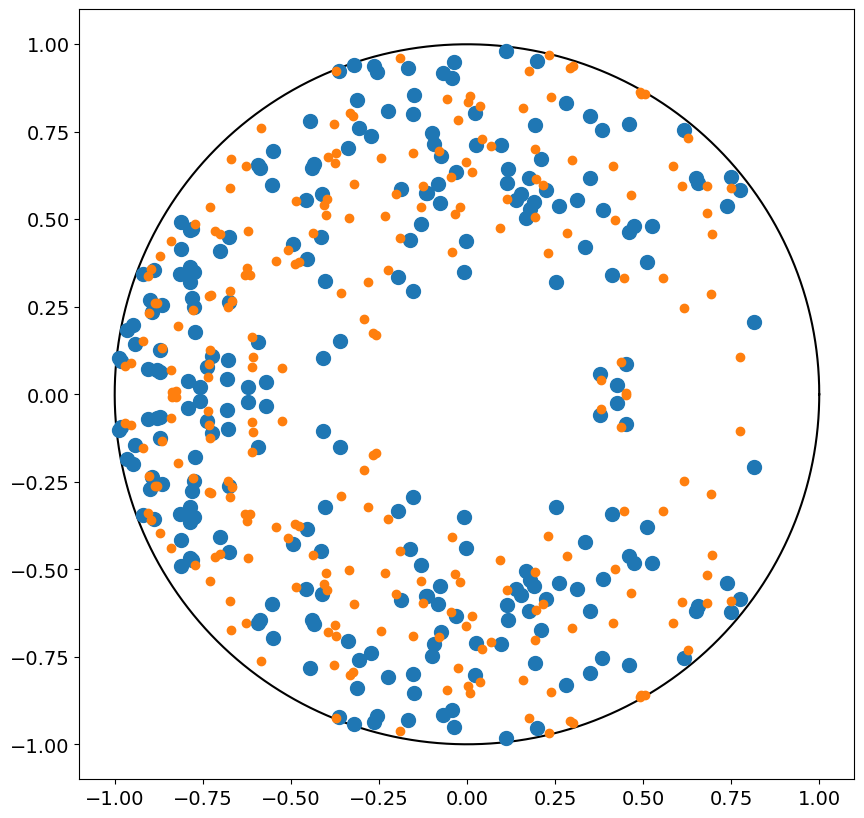

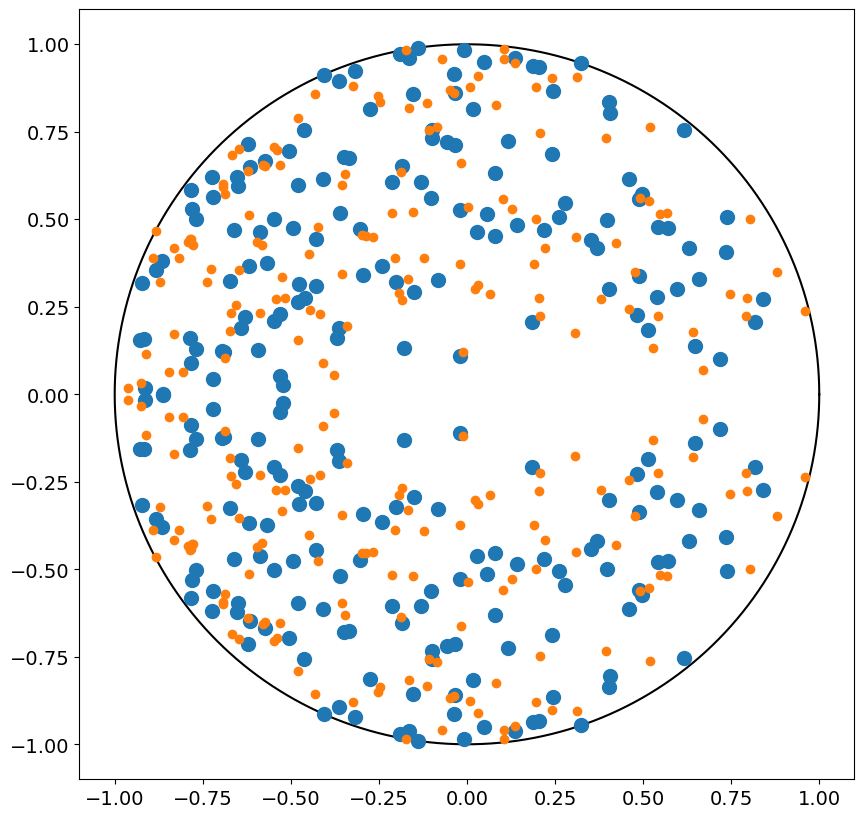

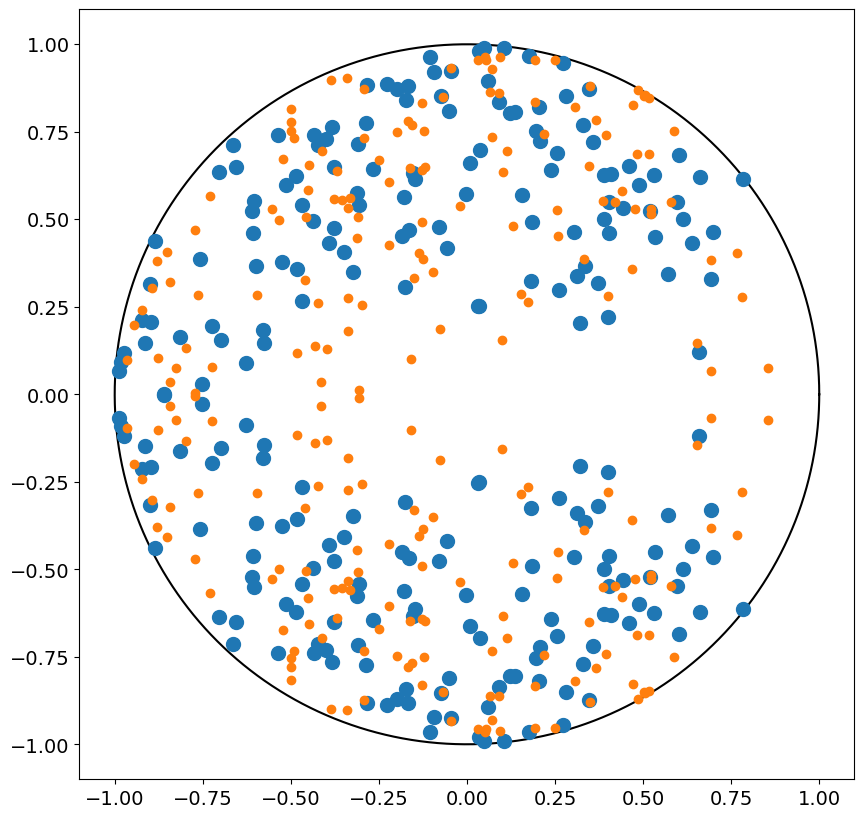

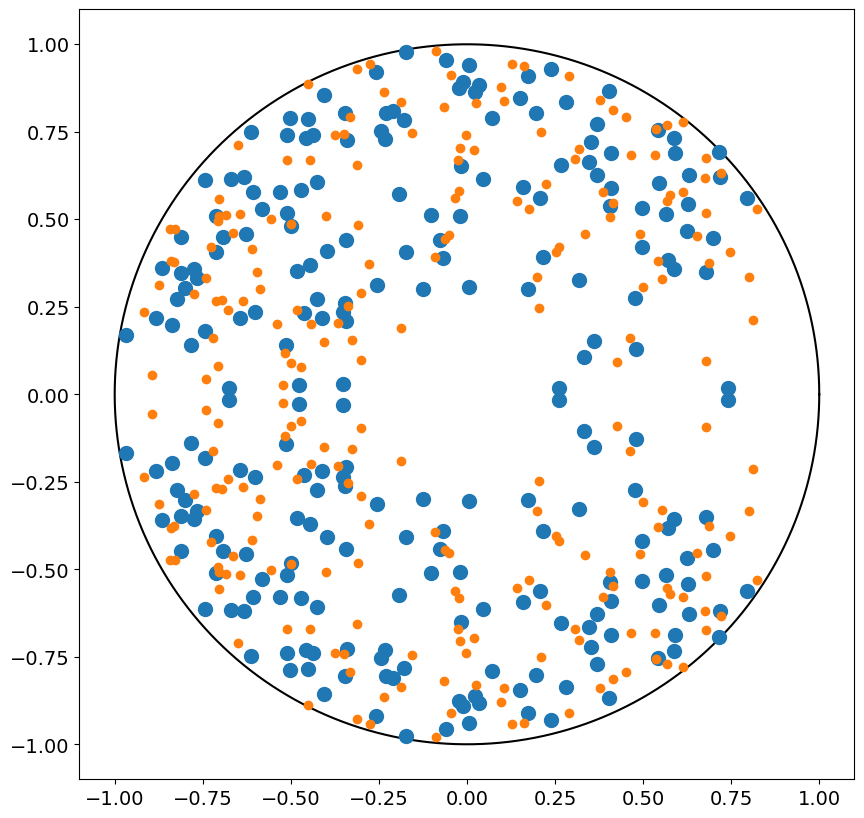

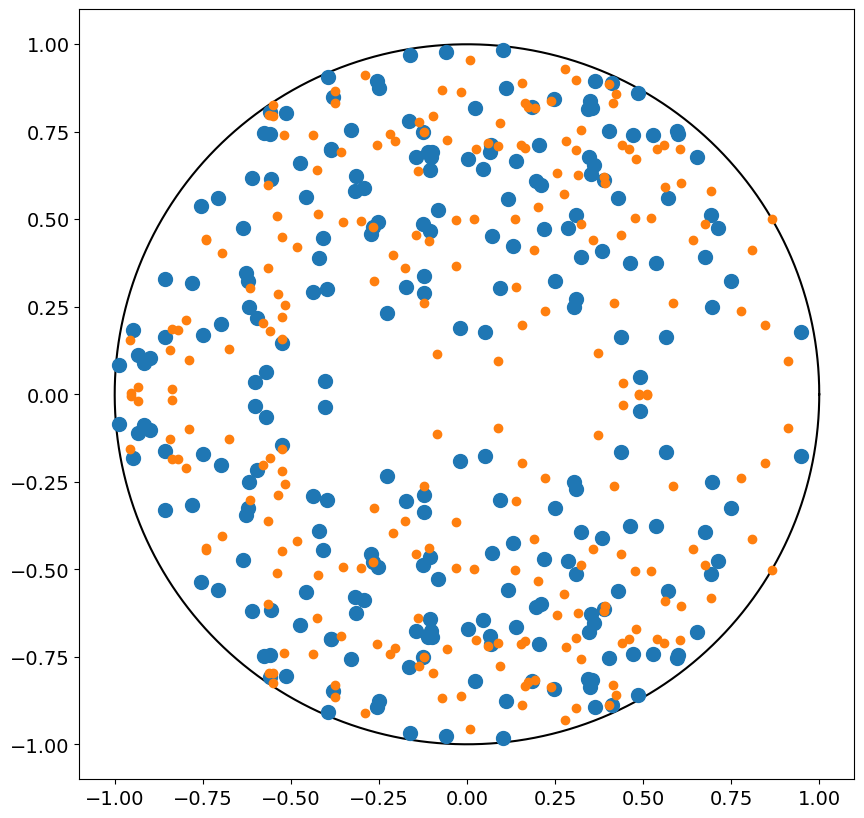

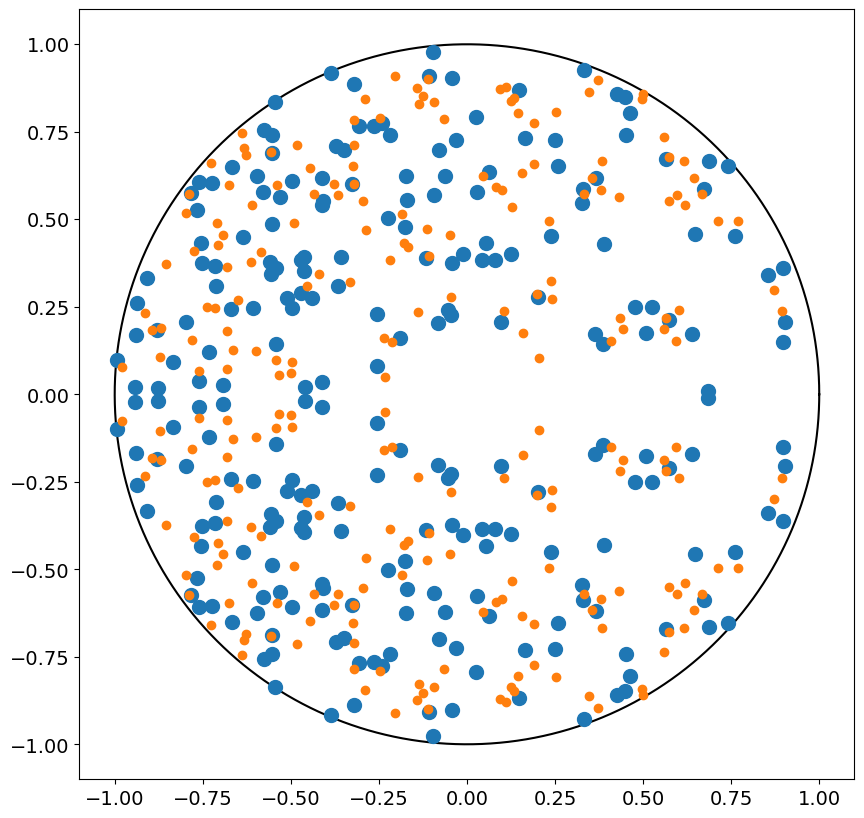

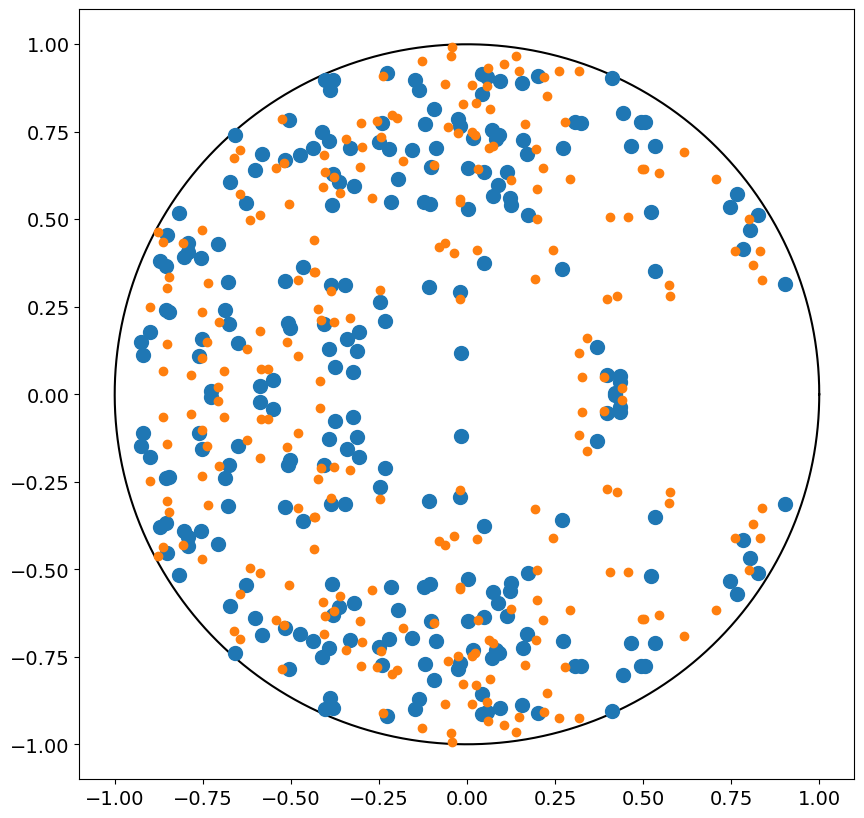

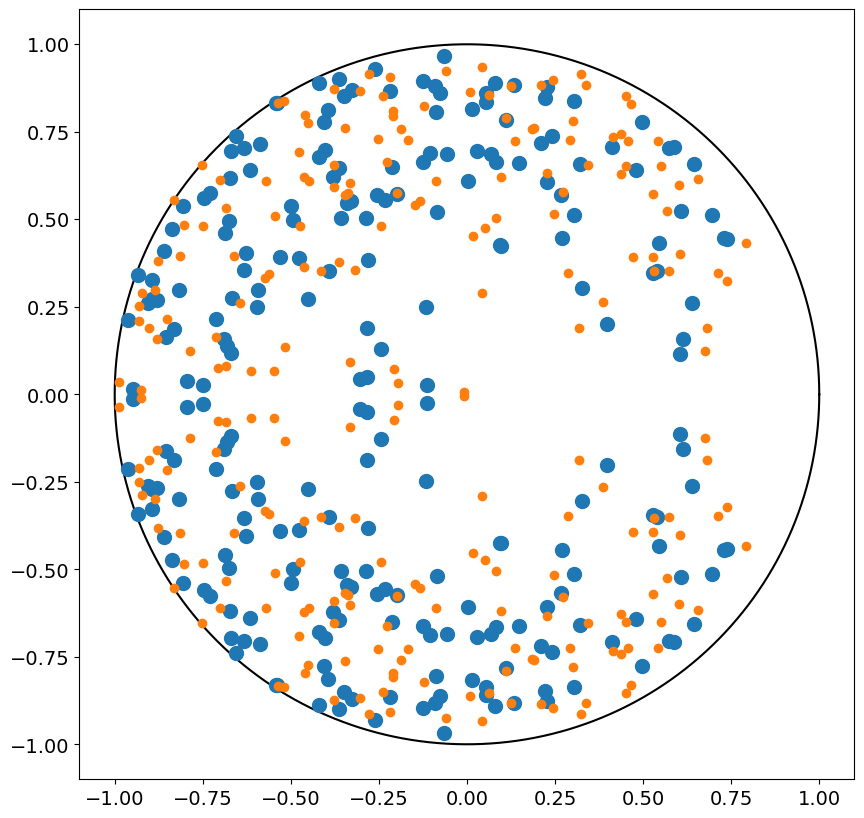

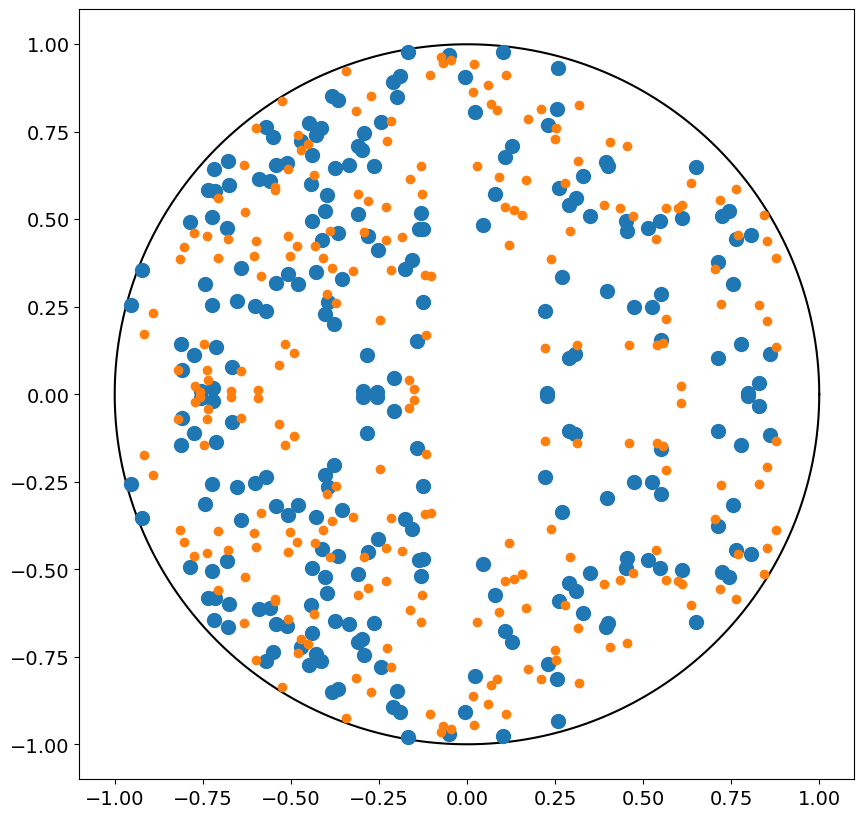

In [18]:
for csr_exp, csr in zip(csr_exp_list, csr_numeric_list):
    csr_exp.plot_circle()
    csr_exp.plot(markersize=10)
    csr.plot(markersize=6)
    plt.show()

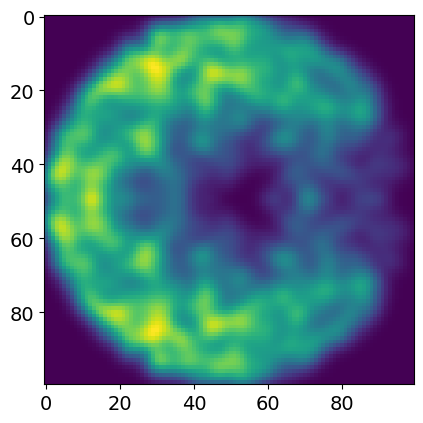

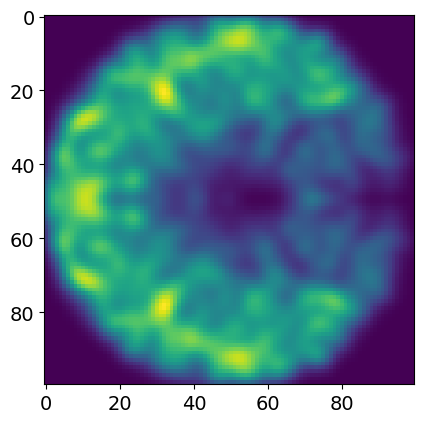

In [19]:
csr_exp_coat = coat_spectrum(Spectrum(csr_exp_list), sigma=0.05)
csr_coat = coat_spectrum(Spectrum(csr_numeric_list), sigma=0.05)

plt.imshow(csr_exp_coat)
plt.show()

plt.imshow(csr_coat)
plt.show()

c:\Users\krist\Documents\ModelNISQ2\notebooks\integrability\synthetic_benchmarks\FF_traceout\../../../../src_tf\analysis.py:49: RuntimeWarning: invalid value encountered in divide
  sample_error = ensemble_err / np.sqrt(hist_count_mean)


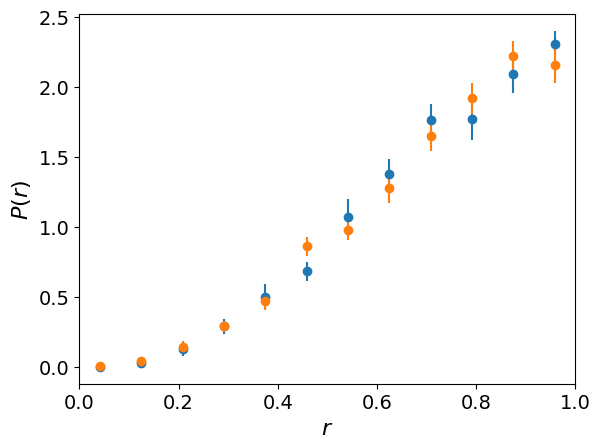

In [20]:
bins, radial_exp_mean, radial_ext_err, radial_ext_serr = hist_ensamble(spectrum_to_radial(csr_exp_list), bins=np.linspace(0, 1, 13), density=True)
bins, radial_num_mean, radial_num_err, radial_num_serr = hist_ensamble(spectrum_to_radial(csr_numeric_list), bins=np.linspace(0, 1, 13), density=True)


plt.errorbar(bins, radial_exp_mean, radial_ext_err, fmt='o', label='experiment')
plt.errorbar(bins, radial_num_mean, radial_num_err, fmt='o', label='numeric')
plt.xlim(0, 1)
plt.xlabel(r"$r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)
plt.savefig("figures/radial_csr_nonintegrable.svg", bbox_inches='tight')
plt.show()

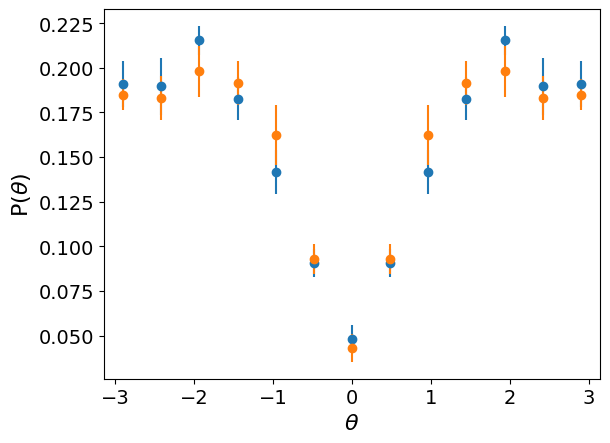

In [21]:
bins, angular_exp_mean, angular_ext_err, angular_ext_serr = hist_ensamble(spectrum_to_angular(csr_exp_list), bins=np.linspace(-np.pi, np.pi, 14), density=True)
bins, angular_num_mean, angular_num_err, angular_num_serr, = hist_ensamble(spectrum_to_angular(csr_numeric_list), bins=np.linspace(-np.pi, np.pi, 14), density=True)

plt.errorbar(bins, angular_exp_mean, angular_ext_err , fmt='o', label='experiment')
plt.errorbar(bins, angular_num_mean, angular_num_err, fmt='o', label='numeric')
plt.xlim(-np.pi, np.pi)
plt.xlabel(r"$\theta$", fontsize=16)
plt.ylabel(r"P($\theta$)", fontsize=16)
plt.savefig("figures/angular_csr_nonintegrable.svg", bbox_inches='tight')
plt.show()

## Scatter plots

In [22]:
radial_exp = spectrum_to_radial(csr_exp_list)
radial_numeric = spectrum_to_radial(csr_numeric_list)

angular_exp = spectrum_to_angular(csr_exp_list)
angular_numeric = spectrum_to_angular(csr_numeric_list)

In [23]:
scatter_noninteg_retrieved = scatterplot_stats(radial_exp, angular_exp)
scatter_noninteg_exact = scatterplot_stats(radial_numeric, angular_numeric)

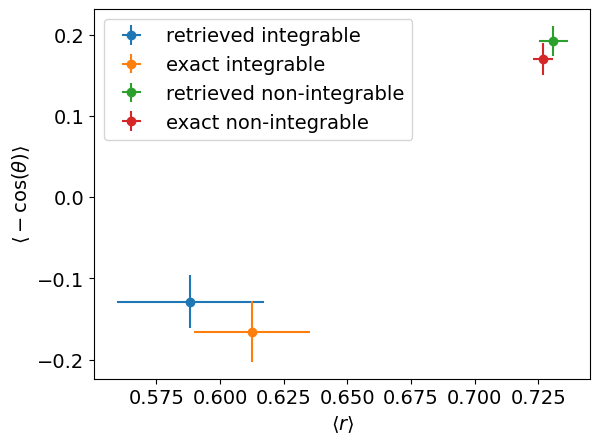

In [24]:
plt.errorbar(scatter_integ_retrieved[0], 
             scatter_integ_retrieved[2], 
             xerr = scatter_integ_retrieved[1],
             yerr = scatter_integ_retrieved[3], 
             fmt='o', 
             label='retrieved integrable')

plt.errorbar(scatter_integ_exact[0], 
             scatter_integ_exact[2], 
             xerr = scatter_integ_exact[1],
             yerr = scatter_integ_exact[3], 
             fmt='o', 
             label='exact integrable')

plt.errorbar(scatter_noninteg_retrieved[0],
            scatter_noninteg_retrieved[2], 
            xerr = scatter_noninteg_retrieved[1],
            yerr = scatter_noninteg_retrieved[3], 
            fmt='o', 
            label='retrieved non-integrable')

plt.errorbar(scatter_noninteg_exact[0],
            scatter_noninteg_exact[2], 
            xerr = scatter_noninteg_exact[1],
            yerr = scatter_noninteg_exact[3], 
            fmt='o', 
            label='exact non-integrable')

plt.xlabel(r'$\langle r \rangle$')
plt.ylabel(r'$\langle -\cos(\theta) \rangle$')

plt.legend(fontsize=14)
plt.savefig("figures/scatter_synthetic.pdf", bbox_inches='tight')
